In [7]:
import json
with open("../decompile-eval/decompile-eval-executable-gcc-ghidra.json") as f:
    org = json.load(f)

In [1]:
import re
def extract_assertions(func):
    # Pattern to capture func0 call within an assert statement
    pattern = re.compile(r"assert\s*\(\s*func0\s*\(([^)]+)\)\s*==\s*(\d+)\s*\);")


    # Find all assertions and store as (input_args_list, output_value) tuples
    results = []
    matches = pattern.findall(func)
    for match in matches:
        # Split function arguments and strip whitespace
        args = match[0].split(",")
        input_args_list = [arg.strip() for arg in args]

        # Expected output is the second captured group
        output_value = int(match[1])

        # Append result as a tuple
        results.append((input_args_list, output_value))

    return results

In [4]:
extract_assertions(org[0]["c_test"])

[(['a', '6', '0.3'], 1),
 (['a', '6', '0.05'], 0),
 (['b', '5', '0.95'], 1),
 (['b', '5', '0.8'], 0),
 (['c', '5', '2.0'], 1),
 (['d', '5', '1.0'], 1),
 (['d', '5', '0.5'], 0)]

In [5]:
print(org[0]["c_test"])

#include <stdio.h>
#include <assert.h>

int main(){
    float a[] = {1.0, 2.0, 3.9, 4.0, 5.0, 2.2};
    assert(func0(a, 6, 0.3) == 1);
    assert(func0(a, 6, 0.05) == 0);

    float b[] = {1.0, 2.0, 5.9, 4.0, 5.0};
    assert(func0(b, 5, 0.95) == 1);
    assert(func0(b, 5, 0.8) == 0);
    
    float c[] = {1.0, 2.0, 3.0, 4.0, 5.0};
    assert(func0(c, 5, 2.0) == 1);

    float d[] = {1.1, 2.2, 3.1, 4.1, 5.1};
    assert(func0(d, 5, 1.0) == 1);
    assert(func0(d, 5, 0.5) == 0);

    return 0;
}


In [6]:
s_len = []
for o in org:
    s = o["input_asm_prompt"]
    s_len.append(len(s))
    if len(s) > 20000:
        print(s)

void func0(char *param_1,long param_2)

{
  int iVar1;
  byte *pbVar2;
  byte bVar3;
  byte bVar4;
  byte bVar5;
  byte bVar6;
  byte bVar7;
  byte bVar8;
  byte bVar9;
  byte bVar10;
  byte bVar11;
  byte bVar12;
  byte bVar13;
  byte bVar14;
  byte bVar15;
  byte bVar16;
  byte bVar17;
  byte bVar18;
  char cVar19;
  char cVar20;
  char cVar21;
  char cVar22;
  char cVar23;
  char cVar24;
  char cVar25;
  char cVar26;
  char cVar27;
  char cVar28;
  char cVar29;
  char cVar30;
  char cVar31;
  char cVar32;
  char cVar33;
  char cVar34;
  char cVar35;
  char cVar36;
  char cVar37;
  char cVar38;
  char cVar39;
  char cVar40;
  char cVar41;
  char cVar42;
  char cVar43;
  char cVar44;
  char cVar45;
  char cVar46;
  char cVar47;
  char cVar48;
  char cVar49;
  char cVar50;
  char cVar51;
  char cVar52;
  char cVar53;
  char cVar54;
  char cVar55;
  char cVar56;
  char cVar57;
  char cVar58;
  char cVar59;
  char cVar60;
  char cVar61;
  char cVar62;
  char cVar63;
  char cVar64;
  char

In [7]:
import numpy as np
np.argmax(s_len)

567

(array([23.,  4., 33., 65., 61., 64., 84., 33., 33., 20., 22., 23., 12.,
        22., 28.,  9., 12., 17., 15., 10.,  6.,  8.,  7.,  3.,  6.,  0.,
         3.,  5.,  3.,  5.,  2.,  0.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

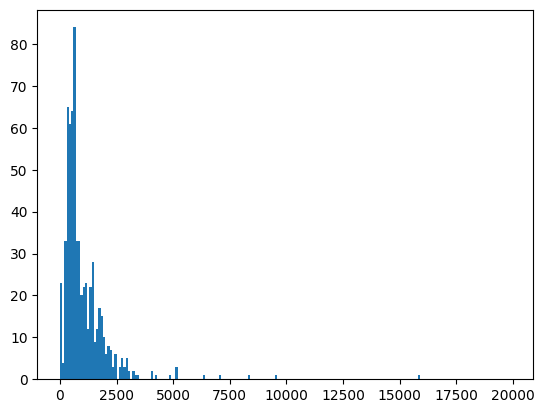

In [20]:
import matplotlib.pyplot as plt

plt.hist(s_len, bins=list(range(0,20000, 100)))

In [8]:
s

'void func0(uint param_1,uint param_2,long param_3,int *param_4)\n\n{\n  int iVar1;\n  uint uVar2;\n  \n  *param_4 = 0;\n  uVar2 = param_2;\n  if ((int)param_2 < (int)param_1) {\n    uVar2 = param_1;\n    param_1 = param_2;\n  }\n  if ((int)param_1 < 10) {\n    if (9 < (int)uVar2) {\n      uVar2 = 9;\n    }\n    do {\n      if ((param_1 & 1) == 0) {\n        iVar1 = *param_4;\n        *param_4 = iVar1 + 1;\n        *(uint *)(param_3 + (long)iVar1 * 4) = param_1;\n      }\n      param_1 = param_1 + 1;\n    } while ((int)param_1 <= (int)uVar2);\n    return;\n  }\n  return;\n}'

In [24]:
np.sort(s_len)[-200:]

array([ 1168,  1172,  1175,  1181,  1181,  1181,  1184,  1191,  1192,
        1224,  1226,  1236,  1260,  1260,  1262,  1266,  1272,  1273,
        1273,  1298,  1299,  1302,  1305,  1310,  1314,  1320,  1327,
        1328,  1337,  1338,  1344,  1344,  1348,  1352,  1352,  1356,
        1360,  1371,  1383,  1387,  1388,  1397,  1399,  1402,  1405,
        1405,  1409,  1410,  1419,  1422,  1426,  1432,  1432,  1434,
        1437,  1441,  1444,  1452,  1456,  1456,  1474,  1476,  1478,
        1479,  1481,  1484,  1484,  1491,  1491,  1497,  1497,  1508,
        1529,  1539,  1539,  1575,  1578,  1584,  1584,  1596,  1621,
        1628,  1629,  1629,  1630,  1630,  1647,  1654,  1654,  1657,
        1685,  1698,  1700,  1710,  1712,  1724,  1731,  1737,  1748,
        1748,  1750,  1766,  1771,  1772,  1775,  1775,  1780,  1783,
        1784,  1801,  1805,  1809,  1816,  1817,  1838,  1847,  1848,
        1856,  1859,  1866,  1873,  1882,  1882,  1891,  1913,  1927,
        1939,  1942,

In [ ]:
print(org[0]["input_asm_prompt"])

undefined8 func0(float param_1,long param_2,int param_3)

{
  int local_10;
  int local_c;
  
  local_10 = 0;
  do {
    local_c = local_10;
    if (param_3 <= local_10) {
      return 0;
    }
    while (local_c = local_c + 1, local_c < param_3) {
      if ((float)(DAT_001020d0 &
                 (uint)(*(float *)(param_2 + (long)local_10 * 4) -
                       *(float *)(param_2 + (long)local_c * 4))) < param_1) {
        return 1;
      }
    }
    local_10 = local_10 + 1;
  } while( true );
}


In [1]:
import json
with open("decompile_result_test_whole_3.json") as f:
    d = json.load(f)

In [2]:
print(d[0])

// Refined source code from given pseudo code and testing code

int gcd(int a) {
    int d = 2;
    while (d * d <= a) {
        int r = a % d;
        while (r == 0 && d < a) {
            a /= d;
            r = a % d;
        }
        d++;
    }
    return a;
}


In [14]:
print(d[100])

// Refined source code from given pseudo code and testing code
#include <string.h>

char* func0(char *param_1) {
    char *pcVar1;
    char *local_18 = param_1;
    char *local_20 = param_1;
    
    while (*local_20!= '\0') {
        pcVar1 = strchr("AEIOUaeiou", (int)*local_20);
        if (pcVar1 == NULL) {
            *local_18 = *local_20;
            local_18++;
        }
        local_20++;
    }
    *local_18 = '\0';
    return param_1;
}


In [16]:
print(org[100]["c_test"])

#include <assert.h>
#include <stdlib.h>
#include <string.h>

int issame(int* a, int a_size, int* b, int b_size) {
    if (a_size != b_size) return 0;
    for (int i = 0; i < a_size; i++) {
        if (a[i] != b[i]) return 0;
    }
    return 1;
}

int main() {
    int size;
    int* result;

    result = func0(2, &size);
    assert(issame(result, size, (const int[]){2}, 1));
    free(result);

    result = func0(4, &size);
    assert(issame(result, size, (const int[]){2, 2}, 2));
    free(result);

    result = func0(8, &size);
    assert(issame(result, size, (const int[]){2, 2, 2}, 3));
    free(result);

    result = func0(3 * 19, &size);
    assert(issame(result, size, (const int[]){3, 19}, 2));
    free(result);

    result = func0(3 * 19 * 3 * 19, &size);
    assert(issame(result, size, (const int[]){3, 3, 19, 19}, 4));
    free(result);

    result = func0(3 * 19 * 3 * 19 * 3 * 19, &size);
    assert(issame(result, size, (const int[]){3, 3, 3, 19, 19, 19}, 6));
    free(result);


In [15]:
print(org[100]["c_func"])

#include <stdio.h>
#include <stdlib.h>

int* func0(int n, int* size) {
    int* out = malloc(sizeof(int) * 64);
    *size = 0;
    for (int i = 2; i * i <= n; i++) {
        while (n % i == 0) {
            n = n / i;
            out[(*size)++] = i;
        }
    }
    if (n > 1) {
        out[(*size)++] = n;
    }
    return out;
}


In [ ]:
for i in 